##### What is Logistic Regression in R?

In logistic regression, we fit a regression curve, `y = f(x)` where **y** represents a **categorical variable**. This model is used to predict that `y` has given a set of predictors `x`. Hence, the predictors can be continuous, categorical or a mix of both.

It is a classification algorithm which comes under nonlinear regression. We use it to predict a `binary outcome (1/ 0, Yes/ No, True/ False)` given as a set of independent variables. Moreover, it helps to represent binary/categorical outcome by using dummy variables.

It is a regression model in which the response variable has categorical values such as True/False or 0/1. Therefore, we are able to measure the probability of the binary response. 

Make sure that you have completed – R 
1. Nonlinear Regression Analysis

![](https://lh3.googleusercontent.com/-g78xO9Itxfs/XdT9q8KBMMI/AAAAAAAAkhc/1Otzbyx-A04pyrS7XPSaKdISkAi4y_4FwCK8BGAsYHg/s0/2019-11-20.png)

**Syntax and Expression of R Logistic Regression**

The general mathematical equation for logistic regression is:

To avoid this problem, you can use the logistic function to model p(X) that gives outputs between 0 and 1 for all values of X:


<h3 align='center'> $y = \frac{1}{e^-(a+b_1x_1+b_2x_2+b_3x_3+…)}$

$\frac{p(X)}{1 - p(X)} = e^{\beta_{0} + \beta_{1}X}$

</h3>

Following is the description of the parameters used:

`y` is the response variable.

`x` is the predictor variable.

`a` and b are the coefficients which are numeric constants.

We use the glm() function to create the regression model and also get its summary for analysis.

###### The syntax of logistic Regression in R:

The basic `syntax` for glm() function in logistic regression is:

glm(formula,data,family)

Description of the parameters used:

**Formula** 

- Presenting the relationship between the variables.
- Data is the dataset giving the values of these variables.

The family is the R object to specify the details of the model. Also, its value is binomial for logistic regression.

###### Derivation of Logistic Regression in R

We use a generalized model as a larger class of algorithms. Basically, this model was proposed by Nelder and Wedderburn in 1972.

The fundamental equation of generalized linear model is:

<h3 align='center'>$g(E(y)) = α + βx_1 + γx_2$</h3>

Here, `g()` is the link function;

`E(y)` is the expectation of target variable, and

<h4 align='center'> $α + βx_1 + γx_2$  is the linear predictor.</h4>

The role of the link function is to ‘link’ the expectation of `y` to linear predictor.

You must definitely check the Multiple Linear Regression in R

###### Performance of Logistic Regression Model
To test the performance of this model, we must consider a few metrics. Irrespective of a tool (SAS, R or Python) you would work on, always look for:

1. `AIC (Akaike Information Criteria)`

In logistic regression, AIC is the analogous metric of adjusted R². Thus, we always prefer the model with the smallest AIC value.

2. `Null Deviance and Residual Deviance`

Null Deviance In null deviance, the response that is predicted by the model is just an intercept. Residual Deviance It indicates the response predicted by a model of adding independent variables.

3. `Confusion Matrix`

It is a type of matrix in which we represent a tabular representation of Actual vs Predicted values. Also, this helps us to find the accuracy of the model and avoid over-fitting.

**Building Logistic Regression Model in R** 

In this section, we will build our logistic regression model using the BreastCancer dataset that is available by default in R. We will start by importing the data and displaying the information related to it with the str() function:

In [1]:
#install.packages('mlbench')
#install.packages('caret')
library(caret)
library(mlbench)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
data(BreastCancer, package = "mlbench")

In [4]:
b_canc = BreastCancer[complete.cases(BreastCancer),]
head(b_canc)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign
1017122,8,10,10,8,7,10,9,7,1,malignant


In [7]:
tail(b_canc)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,763235,3,1,1,1,2,1,2,1,2,benign
695,776715,3,1,1,1,3,2,1,1,1,benign
696,841769,2,1,1,1,2,1,1,1,1,benign
697,888820,5,10,10,3,7,3,8,10,2,malignant
698,897471,4,8,6,4,3,4,10,6,1,malignant
699,897471,4,8,8,5,4,5,10,4,1,malignant


In [20]:
summary(b_canc)

      Id             Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 Length:683         1      :139   1      :373   1      :346   1      :393  
 Class :character   5      :128   10     : 67   2      : 58   2      : 58  
 Mode  :character   3      :104   3      : 52   10     : 58   3      : 58  
                    4      : 79   2      : 45   3      : 53   10     : 55  
                    10     : 69   4      : 38   4      : 43   4      : 33  
                    2      : 50   5      : 30   5      : 32   8      : 25  
                    (Other):114   (Other): 78   (Other): 93   (Other): 61  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :376   1      :402   3      :161   1      :432     1      :563  
 3      : 71   10     :132   2      :160   10     : 60     2      : 35  
 4      : 48   2      : 30   1      :150   3      : 42     3      : 33  
 1      : 44   5      : 30   7      : 71   2      : 36     10     : 14  
 6      : 40   3      : 28 

In [22]:
dim(b_canc)

[1] 683  11

In [10]:
set.seed(100)

In [12]:
Train_Ratio <- createDataPartition(b_canc$Class, p=0.8, list = FALSE)

In [14]:
Train_Data <- b_canc[Train_Ratio, ]
head(Train_Data)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant
7,1018099,1,1,1,1,2,10,3,1,1,benign


In [19]:
dim(Train_Data)

[1] 548  11

In [23]:
Test_Data <- b_canc[-Train_Ratio, ]
head(Test_Data)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
5,1017023,4,1,1,3,2,1,3,1,1,benign
9,1033078,2,1,1,1,2,1,1,1,5,benign
12,1036172,2,1,1,1,2,1,2,1,1,benign
13,1041801,5,3,3,3,2,3,4,4,1,malignant
14,1043999,1,1,1,1,2,3,3,1,1,benign
19,1050670,10,7,7,6,4,10,4,1,2,malignant


In [24]:
dim(Test_Data)

[1] 135  11

In [27]:
fit = glm(Class ~ Cell.shape, family="binomial", data = Train_Data)
fit


Call:  glm(formula = Class ~ Cell.shape, family = "binomial", data = Train_Data)

Coefficients:
 (Intercept)  Cell.shape.L  Cell.shape.Q  Cell.shape.C  Cell.shape^4  
      4.2487       20.7334        6.7620        5.7478       -0.8326  
Cell.shape^5  Cell.shape^6  Cell.shape^7  Cell.shape^8  Cell.shape^9  
     -4.5160       -5.6344       -3.1289       -0.8099       -0.8289  

Degrees of Freedom: 547 Total (i.e. Null);  538 Residual
Null Deviance:	    709.8 
Residual Deviance: 200.7 	AIC: 220.7

In [28]:
summary(fit)


Call:
glm(formula = Class ~ Cell.shape, family = "binomial", data = Train_Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5373  -0.1211  -0.1211   0.2857   3.1369  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     4.2487   283.1200   0.015    0.988
Cell.shape.L   20.7334  1131.3243   0.018    0.985
Cell.shape.Q    6.7620   683.4583   0.010    0.992
Cell.shape.C    5.7478   593.4080   0.010    0.992
Cell.shape^4   -0.8326  1142.2608  -0.001    0.999
Cell.shape^5   -4.5160  1350.7327  -0.003    0.997
Cell.shape^6   -5.6344  1145.6845  -0.005    0.996
Cell.shape^7   -3.1289   734.5118  -0.004    0.997
Cell.shape^8   -0.8099   349.0124  -0.002    0.998
Cell.shape^9   -0.8289   108.7795  -0.008    0.994

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 709.85  on 547  degrees of freedom
Residual deviance: 200.72  on 538  degrees of freedom
AIC: 220.72

Number of Fisher Scoring iterations: 17


In [81]:
install.packages('ISLR')

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\reddy\AppData\Local\Temp\RtmpC4BloA\downloaded_packages


In [29]:
library(ISLR)

In [30]:
# The Stock Market Data
names(Smarket)


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [31]:
dim(Smarket)

[1] 1250    9

In [90]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

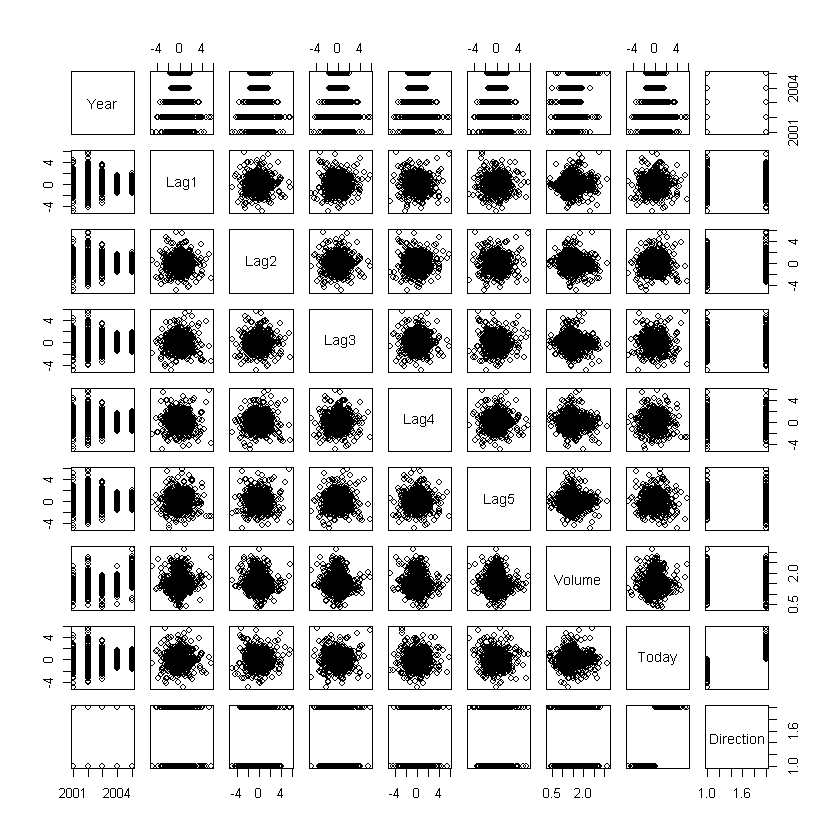

In [32]:
pairs(Smarket)

In [33]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
glm.fits


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
  -0.126000    -0.073074    -0.042301     0.011085     0.009359     0.010313  
     Volume  
   0.135441  

Degrees of Freedom: 1249 Total (i.e. Null);  1243 Residual
Null Deviance:	    1731 
Residual Deviance: 1728 	AIC: 1742

In [34]:
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [39]:
coef(glm.fits)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [40]:
summary(glm.fits)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [41]:
summary(glm.fits)$coef[,4]

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [44]:
glm.probs=predict(glm.fits,type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [50]:
glm.pred=rep("Down",1250)
glm.pred[0:10]

[1] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"

In [62]:
glm.pred[glm.probs>.5]="Up"

In [85]:
glm.Direction =Smarket$Direction

In [86]:
table(glm.pred,glm.Direction)  # 1250 

        glm.Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [68]:
mean(glm.pred==glm.Direction)

[1] 0.5216

In [69]:
glm.Year = Smarket$Year

In [74]:
train =(glm.Year<2005)
train[0:5]

[1] TRUE TRUE TRUE TRUE TRUE

In [76]:
Smarket.2005=Smarket[!train,]

In [78]:
dim(Smarket.2005)

[1] 252   9

In [81]:
Direction.2005=Smarket$Direction[!train]

In [83]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)

In [84]:
glm.fits


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
   0.191213    -0.054178    -0.045805     0.007200     0.006441    -0.004223  
     Volume  
  -0.116257  

Degrees of Freedom: 997 Total (i.e. Null);  991 Residual
Null Deviance:	    1383 
Residual Deviance: 1381 	AIC: 1395

In [87]:
glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction)
(507+145)/1250
mean(glm.pred==Direction)
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)
Direction.2005=Direction[!train]
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
mean(glm.pred!=Direction.2005)
glm.fits=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(106+76)
predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")

ERROR: Error in table(glm.pred, Direction): object 'Direction' not found
